# Graph Ⅲ
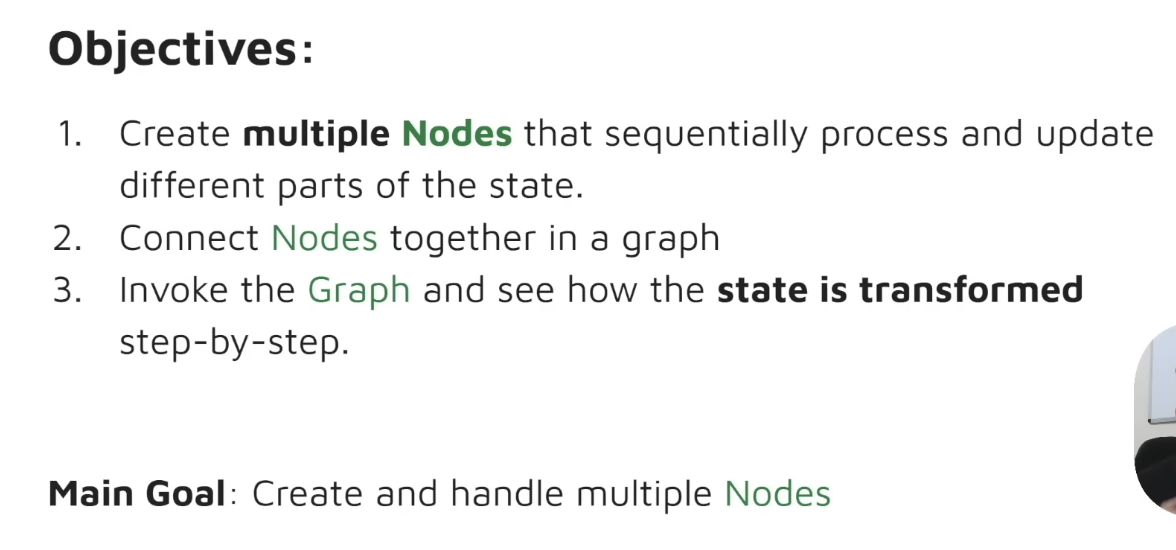

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph
from dataclasses import dataclass

In [2]:
@dataclass
class AgentState(TypedDict):
    name:str
    age:str
    final:str

In [ ]:
def first_node(state: AgentState) -> AgentState:
    """First node: creates a greeting message with the person's name
    
    Args:
        state (AgentState): Current state containing name, age, and final fields
    
    Returns:
        AgentState: Updated state with greeting message in 'final' field
    """
    # Create initial greeting message
    state['final'] = f"Hi {state['name']}!"
    return state


def second_node(state: AgentState) -> AgentState:
    """Second node: appends age information to the greeting message
    
    Args:
        state (AgentState): Current state with greeting from first_node
    
    Returns:
        AgentState: Updated state with complete message including age
    """
    # Append age information to existing greeting
    state['final'] = state['final'] + f" You are {state['age']} years old!"
    return state

In [4]:
graph=StateGraph(AgentState)
graph.add_node("first_node",first_node)
graph.add_node("second_node",second_node)
graph.set_entry_point("first_node")
graph.add_edge("first_node","second_node")
graph.set_finish_point("second_node")
app=graph.compile()

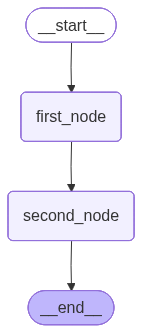

In [5]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
res=app.invoke({"name":"Dave","age":22})
print(res)

{'name': 'Dave', 'age': 22, 'final': 'Hi Dave! You are 22 years old!'}
